# DBSCAN
(Density-based spatial clustering of application with noise，密度為基礎的空間集群法)
  
解釋:  
1.核心點(Core Point):在指定半徑內，至少包含N個相鄰點  
2.邊緣點(Border Point): 在核心點半境內，以邊緣點為中心，同樣半徑內，只包含小於n個相鄰點   
3.雜訊點(Noise Point):非核心點，也非邊緣點

參考圖片
![Image of Yaktocat](https://github.com/Yi-Huei/bin/blob/master/images/DBSCAN_image.png?raw=true)

## 題目:
建立上下弦月資料後，分別使用kmeans、hierarchical、DBSCAN進行分類，並檢驗其效果

## 步驟一: 建立亂數資料集

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

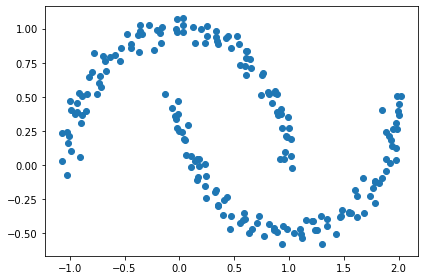

In [7]:
#取得亂數資料，其圖形為上下弦月
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

## 步驟二: 使用kmeans與hierarchical進行分類

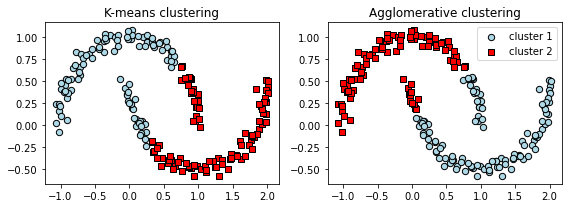

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

## 三、使用DBSCAN進行分類
[參考網站](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)  

採用sklearn.cluster.DBSCAN，參數說明如下:  
eps:設定半徑  
min_samples:設定指定半徑內至少含幾個點  
metric:距離演算法

In [9]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

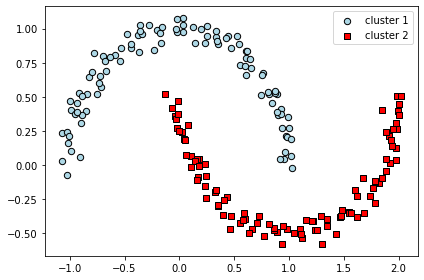

In [10]:
#繪圖
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

#### 結論:利用DBSCAN可將此類型資料分的比較好。